In [1]:
#Call most important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('creditcard_data.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284806, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284806 entries, 0 to 284805
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284806 non-null  float64
 1   V1      284806 non-null  float64
 2   V2      284806 non-null  float64
 3   V3      284806 non-null  float64
 4   V4      284806 non-null  float64
 5   V5      284806 non-null  float64
 6   V6      284806 non-null  float64
 7   V7      284806 non-null  float64
 8   V8      284806 non-null  float64
 9   V9      284806 non-null  float64
 10  V10     284806 non-null  float64
 11  V11     284806 non-null  float64
 12  V12     284806 non-null  float64
 13  V13     284806 non-null  float64
 14  V14     284806 non-null  float64
 15  V15     284806 non-null  float64
 16  V16     284806 non-null  float64
 17  V17     284806 non-null  float64
 18  V18     284806 non-null  float64
 19  V19     284806 non-null  float64
 20  V20     284806 non-null  float64
 21  V21     28

<AxesSubplot:>

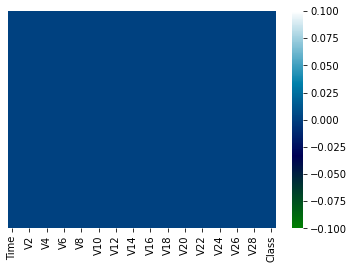

In [6]:
sns.heatmap(df.isnull(), yticklabels=False,cmap="ocean")

As per the above visualization we can seen that there are no missing values in the data.

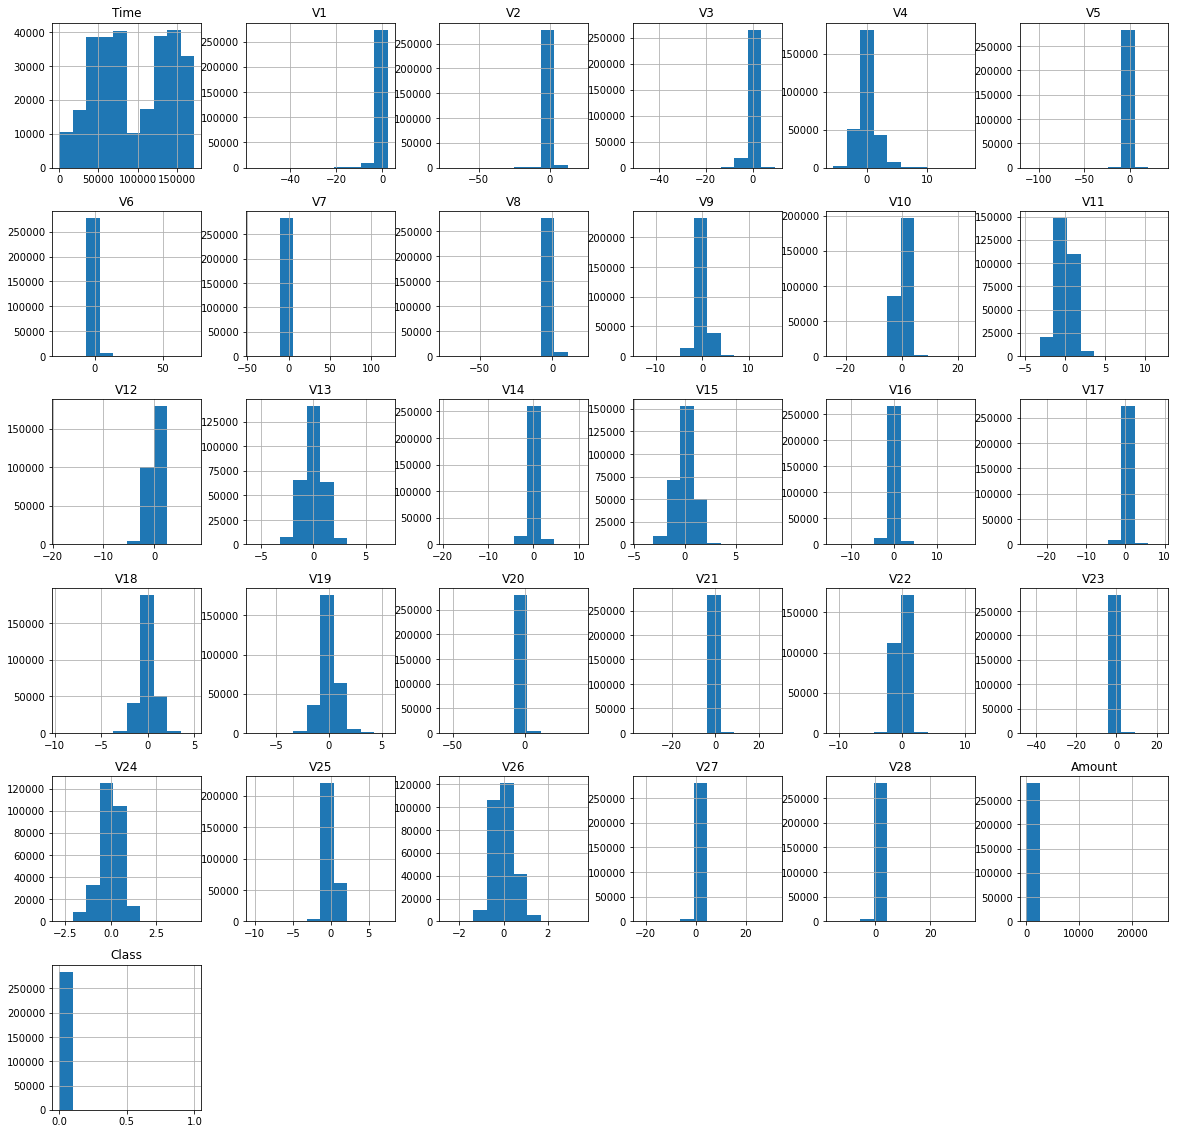

In [7]:
# Visually plotting histogram
df.hist(figsize=(20,20))
plt.show()

As per the above visualization we have observed that most of the variables(V's) falls in 0th Class and least falls in 1st Class(with more outliers).

C:\Users\aasho\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

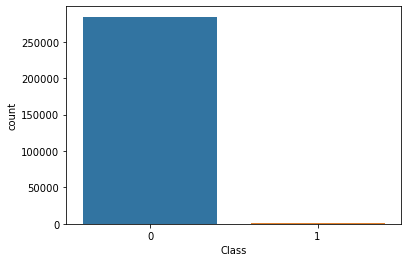

In [8]:
sns.countplot(df['Class'])

In [9]:
fraud_trans = df['Class'][df['Class']==1].count()
valid_trans = df['Class'][df['Class']==0].count()
outliers = fraud_trans/(valid_trans)

print('Fraud Transactions:',fraud_trans)
print('Valid Transactions:',valid_trans)
print('Outliers:',outliers)

Fraud Transactions: 492
Valid Transactions: 284314
Outliers: 0.0017304810878113635


In [10]:
df['Class'].value_counts()

0    284314
1       492
Name: Class, dtype: int64

From the above analysis we can see that out of 284806 transactions only 492 transactions were actual funded to be fradulent i.e., 0.00173%

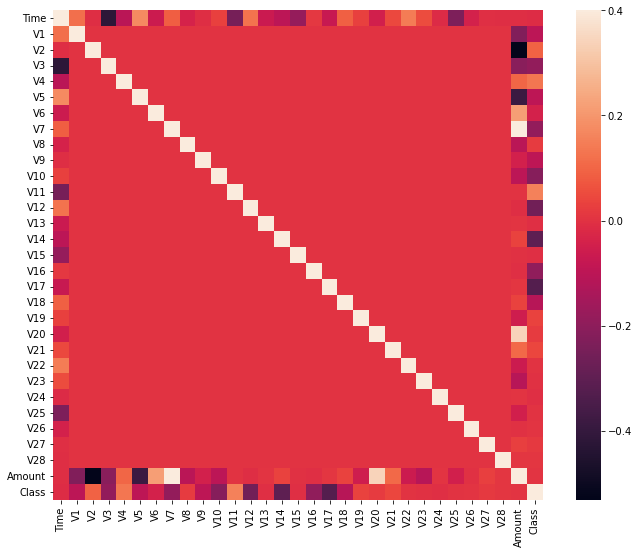

In [11]:
df_correlation = df.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(df_correlation,vmax = 0.4, square = True)
plt.show()

In [12]:
x = df.iloc[:,0:30]

In [13]:
y = df.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled = sc.fit_transform(X_train)

In [16]:
x_test_scaled = sc.fit_transform(X_test)

In [17]:
from sklearn.ensemble import IsolationForest
isf = IsolationForest()

In [18]:
isf.fit(x_train_scaled,y_train)

IsolationForest()

In [19]:
y_pred_isf=isf.predict(x_test_scaled)
y_pred_isf[y_pred_isf == -1] = 1
y_pred_isf[y_pred_isf == 1] = 0

In [20]:
from sklearn.metrics import accuracy_score, classification_report
print('accuracy_score', accuracy_score(y_test,y_pred_isf))

accuracy_score 0.9983322214809873


In [22]:
print(classification_report(y_test,y_pred_isf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56867
           1       0.00      0.00      0.00        95

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



C:\Users\aasho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aasho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aasho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from sklearn.neighbors import LocalOutlierFactor
Lof = LocalOutlierFactor(novelty=False)

In [24]:
Lof.fit_predict(x_train_scaled,y_train)

array([1, 1, 1, ..., 1, 1, 1])

In [25]:
Lof.negative_outlier_factor_

array([-0.98053323, -1.24355642, -1.06727966, ..., -0.98072083,
       -1.13455228, -1.05007653])

In [26]:
y_pred_Lof=Lof.fit_predict(x_test_scaled)
y_pred_Lof[y_pred_Lof == -1] = 1
y_pred_Lof[y_pred_Lof == 1] = 0

In [27]:
print('accuracy_score', accuracy_score(y_test,y_pred_Lof))

accuracy_score 0.9983322214809873


In [28]:
print(classification_report(y_test,y_pred_Lof))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56867
           1       0.00      0.00      0.00        95

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



C:\Users\aasho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aasho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aasho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy scores for both the models are seen to be about 0.998 which is extremely high which denotes that the model is performing well.